In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#读取训练数据，原表格全部都放在了一列上，所以要加sep=' '
train = pd.read_csv('./raw_data/used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('./raw_data/used_car_testB_20200421.csv', sep=' ')

In [3]:
#简单的数据清洗
#异常值处理
train.replace(to_replace = '-', value = np.nan, inplace = True)
test.replace(to_replace = '-', value = np.nan, inplace = True)

In [4]:
#power异常值处理
train['power'][train['power']>600]=600
test['power'][test['power']>600]=600

C:\Users\Administrator.000\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator.000\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#缺失值填充
train.fillna(train.median(),inplace= True)
test.fillna(train.median(),inplace= True)

In [6]:
#提取特征
features = ['model','brand','bodyType','fuelType','regionCode','regionCode','regDate','creatDate','kilometer',
        'notRepairedDamage','power','v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6','v_7', 'v_8', 'v_9',
        'v_10', 'v_11', 'v_12', 'v_13', 'v_14']

In [7]:
#特征归一化
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train[features])
x = min_max_scaler.transform(train[features])
x_ = min_max_scaler.transform(test[features])

In [8]:
#取出标签
y_train = train['price']

In [9]:
#切分数据集
x_train,x_test,y_train,y_test = train_test_split(x,y_train,test_size = 0.2, random_state=28)

In [10]:
#建立模型
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(250,activation='relu',input_shape=[26]),
        tf.keras.layers.Dense(250,activation='relu'),
        tf.keras.layers.Dense(250,activation='relu'),
        tf.keras.layers.Dense(1)])

In [11]:
#模型优化参数选择
model.compile(loss='mean_absolute_error', optimizer='Adam')

In [12]:
#断点续训
checkpoint_save_path = "./checkpoint/Second_hand_car2.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

#断点续训
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

In [13]:
#模型拟合
history = model.fit(x_train, y_train, batch_size=2048, epochs=900, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

Epoch 1/900
59/59 [==============================] - 0s 8ms/step - loss: 5571.0381 - val_loss: 4502.4150
Epoch 2/900
59/59 [==============================] - 0s 6ms/step - loss: 4268.8462 - val_loss: 4108.7808
Epoch 3/900
59/59 [==============================] - 0s 6ms/step - loss: 3636.0139 - val_loss: 2824.7915
Epoch 4/900
59/59 [==============================] - 0s 6ms/step - loss: 1923.1786 - val_loss: 1451.3134
Epoch 5/900
59/59 [==============================] - 0s 6ms/step - loss: 1286.3973 - val_loss: 1212.8895
Epoch 6/900
59/59 [==============================] - 0s 6ms/step - loss: 1141.7288 - val_loss: 1114.2518
Epoch 7/900
59/59 [==============================] - 0s 6ms/step - loss: 1062.6320 - val_loss: 1049.0199
Epoch 8/900
59/59 [==============================] - 0s 6ms/step - loss: 1005.5137 - val_loss: 997.0315
Epoch 9/900
59/59 [==============================] - 0s 6ms/step - loss: 959.9132 - val_loss: 955.1321
Epoch 10/900
59/59 [==============================] - 0s 6

59/59 [==============================] - 0s 4ms/step - loss: 522.9587 - val_loss: 538.8582
Epoch 158/900
59/59 [==============================] - 0s 4ms/step - loss: 520.9263 - val_loss: 532.5810
Epoch 159/900
59/59 [==============================] - 0s 6ms/step - loss: 518.5717 - val_loss: 531.4022
Epoch 160/900
59/59 [==============================] - 0s 6ms/step - loss: 519.2084 - val_loss: 530.9695
Epoch 161/900
59/59 [==============================] - 0s 6ms/step - loss: 518.6526 - val_loss: 529.5632
Epoch 162/900
59/59 [==============================] - 0s 4ms/step - loss: 519.3636 - val_loss: 529.7650
Epoch 163/900
59/59 [==============================] - 0s 6ms/step - loss: 517.4445 - val_loss: 529.4057
Epoch 164/900
59/59 [==============================] - 0s 5ms/step - loss: 517.6100 - val_loss: 534.1255
Epoch 165/900
59/59 [==============================] - 0s 5ms/step - loss: 517.0369 - val_loss: 536.6135
Epoch 166/900
59/59 [==============================] - 0s 6ms/step - 

59/59 [==============================] - 0s 5ms/step - loss: 476.2351 - val_loss: 500.1838
Epoch 314/900
59/59 [==============================] - 0s 5ms/step - loss: 476.5469 - val_loss: 497.8154
Epoch 315/900
59/59 [==============================] - 0s 5ms/step - loss: 476.1370 - val_loss: 497.6819
Epoch 316/900
59/59 [==============================] - 0s 6ms/step - loss: 477.1796 - val_loss: 493.6349
Epoch 317/900
59/59 [==============================] - 0s 4ms/step - loss: 476.0852 - val_loss: 495.7435
Epoch 318/900
59/59 [==============================] - 0s 4ms/step - loss: 475.2000 - val_loss: 496.8079
Epoch 319/900
59/59 [==============================] - 0s 5ms/step - loss: 477.6280 - val_loss: 495.1805
Epoch 320/900
59/59 [==============================] - 0s 6ms/step - loss: 475.5384 - val_loss: 493.2932
Epoch 321/900
59/59 [==============================] - 0s 4ms/step - loss: 475.2020 - val_loss: 496.7161
Epoch 322/900
59/59 [==============================] - 0s 5ms/step - 

59/59 [==============================] - 0s 5ms/step - loss: 461.4618 - val_loss: 487.9646
Epoch 470/900
59/59 [==============================] - 0s 5ms/step - loss: 459.1107 - val_loss: 490.1852
Epoch 471/900
59/59 [==============================] - 0s 5ms/step - loss: 460.4214 - val_loss: 490.7218
Epoch 472/900
59/59 [==============================] - 0s 6ms/step - loss: 458.7290 - val_loss: 483.1362
Epoch 473/900
59/59 [==============================] - 0s 6ms/step - loss: 458.5704 - val_loss: 482.7459
Epoch 474/900
59/59 [==============================] - 0s 5ms/step - loss: 459.7737 - val_loss: 484.6733
Epoch 475/900
59/59 [==============================] - 0s 5ms/step - loss: 457.7136 - val_loss: 483.8808
Epoch 476/900
59/59 [==============================] - 0s 5ms/step - loss: 458.2482 - val_loss: 485.0156
Epoch 477/900
59/59 [==============================] - 0s 4ms/step - loss: 461.8798 - val_loss: 486.2503
Epoch 478/900
59/59 [==============================] - 0s 5ms/step - 

59/59 [==============================] - 0s 5ms/step - loss: 446.3012 - val_loss: 474.5372
Epoch 626/900
59/59 [==============================] - 0s 4ms/step - loss: 445.4860 - val_loss: 478.8387
Epoch 627/900
59/59 [==============================] - 0s 4ms/step - loss: 446.8732 - val_loss: 475.0185
Epoch 628/900
59/59 [==============================] - 0s 5ms/step - loss: 445.8612 - val_loss: 483.4670
Epoch 629/900
59/59 [==============================] - 0s 5ms/step - loss: 447.0155 - val_loss: 474.1094
Epoch 630/900
59/59 [==============================] - 0s 4ms/step - loss: 446.0072 - val_loss: 474.7406
Epoch 631/900
59/59 [==============================] - 0s 4ms/step - loss: 445.6796 - val_loss: 478.1202
Epoch 632/900
59/59 [==============================] - 0s 5ms/step - loss: 445.0570 - val_loss: 473.1653
Epoch 633/900
59/59 [==============================] - 0s 5ms/step - loss: 447.9500 - val_loss: 473.3608
Epoch 634/900
59/59 [==============================] - 0s 5ms/step - 

Epoch 781/900
59/59 [==============================] - 0s 4ms/step - loss: 438.2506 - val_loss: 467.8076
Epoch 782/900
59/59 [==============================] - 0s 5ms/step - loss: 437.5942 - val_loss: 467.8991
Epoch 783/900
59/59 [==============================] - 0s 5ms/step - loss: 439.4785 - val_loss: 473.1802
Epoch 784/900
59/59 [==============================] - 0s 5ms/step - loss: 437.3724 - val_loss: 479.1770
Epoch 785/900
59/59 [==============================] - 0s 5ms/step - loss: 439.3920 - val_loss: 471.5314
Epoch 786/900
59/59 [==============================] - 0s 5ms/step - loss: 438.7248 - val_loss: 487.2294
Epoch 787/900
59/59 [==============================] - 0s 4ms/step - loss: 439.6182 - val_loss: 468.6240
Epoch 788/900
59/59 [==============================] - 0s 5ms/step - loss: 437.4967 - val_loss: 468.8578
Epoch 789/900
59/59 [==============================] - 0s 5ms/step - loss: 436.0485 - val_loss: 469.8592
Epoch 790/900
59/59 [==============================] - 

59/59 [==============================] - 0s 5ms/step - loss: 434.9721 - val_loss: 476.4400
Epoch 860/900
59/59 [==============================] - 0s 5ms/step - loss: 434.8731 - val_loss: 470.6961
Epoch 861/900
59/59 [==============================] - 0s 5ms/step - loss: 435.0433 - val_loss: 466.1908
Epoch 862/900
59/59 [==============================] - 0s 4ms/step - loss: 436.6858 - val_loss: 468.8587
Epoch 863/900
59/59 [==============================] - 0s 4ms/step - loss: 434.6470 - val_loss: 470.6378
Epoch 864/900
59/59 [==============================] - 0s 5ms/step - loss: 437.7352 - val_loss: 468.7251
Epoch 865/900
59/59 [==============================] - 0s 5ms/step - loss: 435.6534 - val_loss: 467.5525
Epoch 866/900
59/59 [==============================] - 0s 5ms/step - loss: 432.6969 - val_loss: 466.1553
Epoch 867/900
59/59 [==============================] - 0s 5ms/step - loss: 434.0971 - val_loss: 469.9696
Epoch 868/900
59/59 [==============================] - 0s 5ms/step - 

In [14]:
#保存模型参数
# print(model.trainable_variables)
file = open('./weights2.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

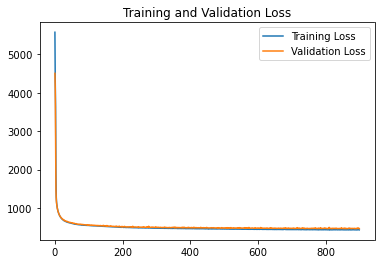

In [15]:
# 显示训练集和验证集的acc和loss曲线
#acc = history.history['sparse_categorical_accuracy']
#val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plt.subplot(1, 2, 1)
#plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
#plt.title('Training and Validation Accuracy')
#plt.legend()

#plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [16]:
#输出结果预测
y_predict=model.predict(x_)
y_predict.shape

(50000, 1)

In [17]:
test_price = pd.DataFrame(y_predict,columns = ['price'])
results = pd.concat([test['SaleID'],test_price],axis = 1)
results.to_csv('results.csv',sep = ',',index = None)
